/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/run5.qpAdm.out


/home/mel_yang/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mel_yang/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Helvetica-Normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


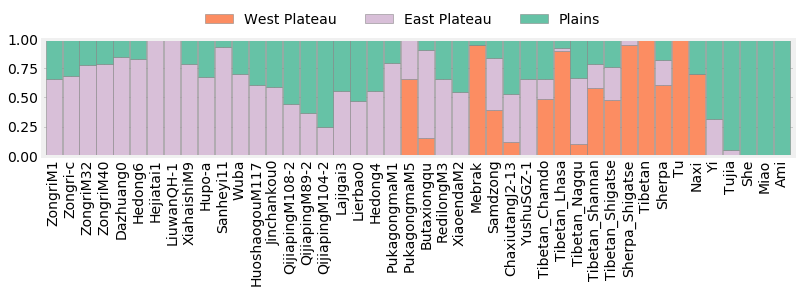

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
#plt.style.use('classic')
#rcParams['font.family'] = 'Helvetica'
rcParams['font.family'] = 'Helvetica-Normal'
plt.style.use('fivethirtyeight')
#matplotlib.rc('font', family='sans-serif') 
#matplotlib.rc('font', serif='Helvetica') 
low=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40",#"ZongriM78", #
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",# #"XiahaishiM22",
     "Hupo-a","Sanheyi11",  #"Hupo14","Shangluzhuang0", #
     "Wuba","HuoshaogouM117",
     "Jinchankou0","QijiapingM108-2","QijiapingM89-2","QijiapingM104-2", # #"Wenpuju03",
     "Lajigai-a","Lierbao0","Hedong4"] #"Qunke1","Hupo8", #"Lajigai2",
high=["PukagongmaM1","PukagongmaM5", #"PukagongmaM3", #"PukagongmaM2",
     "Butaxiongqu","RedilongM3","XiaoendaM2", #"XiaoendaM1", #
     "Chokhopani","Mebrak","Samdzong","CaixiutangJ2-13","YushuSGZ-1"]
eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
eas=["Tu","Naxi","Yi","Tujia","She","Miao","Ami"]#,"Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX",'Tibetan','Sherpa']
atib=low+high+tib+eas
pd="/mnt/solexa/mel_yang/aPlateau/rev_072418/qpadm/3pop/"
run="run5"
outsource=('1',"Chokhopani","Zongri-a","Han")
pats=['pat1','pat2','pat3','pat4','pat5','pat6','pat7']
targets=atib
outs=[]
mydat={}
logfile=open(pd+run+".qpAdm.out",'r')
print pd+run+".qpAdm.out"
for lineind,line in enumerate(logfile):
    if line[0]=="#": outs.append(line.split()[1].split(',')); continue
    x=line.split()
    if x[0]=="outgroup": header=x; continue
    if tuple(x[:4])!=outsource: continue
    mydat[x[4]]={}
    myary=np.zeros((7,4))
    for patind,pat in enumerate(pats):
        #mypat=x[header.index(pat)]
        myary[patind,0]=float(x[header.index("p_"+pat)])
        myary[patind,1]=float(x[header.index("1_"+pat)])
        myary[patind,2]=float(x[header.index("2_"+pat)])
        myary[patind,3]=float(x[header.index("3_"+pat)])
    mydat[x[4]] = myary.astype('float')

for i in range(3):
    if outsource[i] in atib: atib.remove(outsource[i])

fary=np.zeros((len(atib),3))
for target in atib:
    #print target
    if target not in mydat: print target; continue
    pval=0.05
    for i in range(7):
        if i<=3:
            #print i, mydat[target][i,0]
            if mydat[target][i,0]<pval: continue
            testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
            #print i, sum(testneg)
            if sum(testneg)>0: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
            if i==0: break
        else:
            if pval != 0.05 and i==4: break
            if mydat[target][i,0]<pval: continue
            pval=mydat[target][i,0]
            fary[atib.index(target),:]=mydat[target][i,1:4]
    if sum(fary[atib.index(target),:])==0: 
        pval=0
        for i in range(7):
            if i<=3:
                if mydat[target][i,0]<pval: continue
                testneg=[1 for j in mydat[target][i,1:4] if j<0 or j>1]
                if sum(testneg)>0: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
                if i==0: break
            else:
                if pval != 0.0 and i==4: break
                #print target, pval
                if mydat[target][i,0]<pval: continue
                pval=mydat[target][i,0]
                fary[atib.index(target),:]=mydat[target][i,1:4]
#print mydat["PukagongmaM5"]
#print mydat["Butaxiongqu"]
#print "Naxi"
#print mydat["Naxi"]
mynames=[i if '_' not in i else i[:-1] for i in atib]
mynames[mynames.index("Lajigai-a")]="Lajigai3"
mynames[mynames.index("Zongri-b")]="ZongriM1"
mynames[mynames.index("Daxiang0")]="Dazhuang0"
mynames[mynames.index("CaixiutangJ2-13")]="ChaxiutangJ2-13"
mynames[mynames.index("Hejiatai")]="Hejiatai1"

fary=np.transpose(fary)
ind=np.arange(len(mynames))
width=0.95
fig = plt.figure(figsize=(12,2),facecolor='white')
rcParams['font.family'] = 'Helvetica-Normal'
ax1=fig.add_subplot(1,1,1)
p1=ax1.bar(ind,fary[0,:],width,align='center',color=(0.988, 0.553, 0.384),edgecolor='gray')
p2=ax1.bar(ind,fary[1,:],width,bottom=fary[0,:],align='center',color='thistle',edgecolor='gray')
p3=ax1.bar(ind,fary[2,:],width,bottom=fary[0,:]+fary[1,:],align='center',edgecolor='gray',color=(0.40, 0.76, 0.65))
ax1.set_xticks(ind)
ax1.set_xticklabels(mynames,rotation=90,fontname='Helvetica')
ax1.set_ylim((0,1))
ax1.set_xlim((-0.7,len(atib)-0.3))
#ax1.xaxis.tick_top()
#plt.legend((p1[0],p2[0],p3[0]),('Chokhopani','Zongri-a','Han'),bbox_to_anchor=(0.73,-0.06),ncol=3,frameon=False)
plt.legend((p1[0],p2[0],p3[0]),('West Plateau','East Plateau','Plains'),bbox_to_anchor=(0.2,1),ncol=3,frameon=False)

#print matplotlib.colors.to_hex('thistle')
#print matplotlib.colors.to_hex((0.988, 0.553, 0.384))
#print matplotlib.colors.to_hex((0.40, 0.76, 0.65))
plt.show()

In [5]:
import matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print names
#if 'DejaVu Sans' in names: print 'yes'
for i in sorted(names): print i

[u'Lohit Telugu', u'DejaVu Sans', u'Jomolhari', u'Waree', u'Liberation Serif', u'Lohit Devanagari', u'DejaVu Sans', u'DejaVu Sans', u'Liberation Serif', u'PakTypeNaqsh', u'STIXGeneral', u'Unikurd Web', u'DejaVu Sans Mono', u'Waree', u'DejaVu LGC Sans Mono', u'Waree', u'DejaVu Sans', u'DejaVu Serif', u'Waree', u'Liberation Serif', u'Tibetan Machine Uni', u'Liberation Sans', u'DejaVu Sans Mono', u'Madan2', u'DejaVu Serif', u'Lohit Gujarati', u'Lohit Tamil', u'UnDotum', u'Abyssinica SIL', u'OpenSymbol', u'DejaVu Sans', u'DejaVu Sans Mono', u'Lohit Oriya', u'DejaVu Sans Mono', u'Carlito', u'STIXGeneral', u'Liberation Mono', u'LKLUG', u'STIXGeneral', u'Padauk', u'Meera', u'Carlito', u'DejaVu Serif', u'Caladea', u'DejaVu Serif', u'Padauk', u'Caladea', u'Liberation Mono', u'Carlito', u'Lohit Assamese', u'UnDotum', u'Liberation Sans', u'STIXGeneral', u'Khmer OS Content', u'Liberation Sans', u'DejaVu Sans', u'Lohit Kannada', u'DejaVu Sans', u'DejaVu Serif', u'Carlito', u'Liberation Mono', u'VL 

In [4]:
import matplotlib
matplotlib.font_manager._rebuild()